<a href="https://www.kaggle.com/code/nirumma/creditcardfrauddetection?scriptVersionId=284777846" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


# 🛡️ Credit Card Fraud Detection — End-to-End ML Project  
### A complete pipeline for handling extreme class imbalance, building robust models, and optimizing fraud detection

## 📌 Overview
Credit card fraud detection is a critical machine learning application with real financial impact. Fraud cases are extremely rare (~0.17%) and require specialized techniques beyond standard classification.

The goal of this notebook is to build an **end-to-end ML pipeline** that:

- Understands the data distribution  
- Handles extreme class imbalance safely  
- Trains multiple classification models  
- Compares them using appropriate metrics  
- Applies oversampling methods  
- Tunes the decision threshold for optimal real-world performance  
- Provides interpretability using feature importance  

This notebook is structured as follows:

### 🔹 Notebook Structure
1. **Importing Libraries & Loading Data**  
2. **Exploratory Data Analysis (EDA)**  
3. **Preprocessing & Scaling**  
4. **Train-Test Split (with stratification)**  
5. **Baseline Model: Logistic Regression**  
6. **Ensemble Model: Random Forest**  
7. **Oversampling + Random Forest**  
8. **Threshold Tuning for Optimal Performance**  
9. **Feature Importance Analysis**  
10. **Model Comparison Table**  
11. **Final Conclusion & Insights**

### 🚀 Final Model
The project concludes that:  
**Random Forest + Oversampling + Custom Threshold (0.40)** achieves the best balance of precision and recall.

This notebook is suitable for:  
- ML beginners trying to understand imbalanced datasets  
- Kaggle learners  
- Students preparing for placements  
- Anyone wanting a clean, real-world ML project in their portfolio  

Let's begin!


# Project Workflow
## 1. Business Understanding

Credit card fraud detection is a critical challenge faced by banks and financial institutions. Fraudulent transactions account for a very small percentage of all transactions, making the dataset highly imbalanced.
The objective is to build a machine learning model that can identify fraudulent transactions with high recall and acceptable precision.

## 2. Data Understanding
Dataset Description

Contains anonymized credit card transaction data.

Features:

V1 to V28 → PCA-transformed features

Time → seconds elapsed since the first transaction

Amount → transaction amount

Target variable:

Class = 0 → Not Fraud

Class = 1 → Fraud

Key Points to Explore

Dataset size

Class distribution

Descriptive statistics

Basic correlations (although features are PCA-transformed)

## 3. Exploratory Data Analysis (EDA)
Goals

Understand differences between fraud and non-fraud transactions

Identify patterns in:

Transaction amount

Transaction time

Visualize:

Class imbalance

Boxplots / histograms of important features

Correlation heatmap (optional due to PCA features)

Why EDA Matters

Helps form intuition about the dataset

Helps guide further preprocessing and model selection

Provides insights you can clearly explain in interviews

## 4. Data Preprocessing
Steps

Train–Test Split using Stratification

Ensures fraud ratio remains consistent in both sets.

Feature Scaling

Scale Amount and Time using StandardScaler.

PCA features are already scaled.

Handle Class Imbalance (Very Important)

Two approaches will be tried:

Class-weighted models

SMOTE Oversampling on training data only

Prevents data leakage by ensuring synthetic samples never enter the test set.

Why these steps?

Scaling is needed for models that depend on feature magnitude.

SMOTE must be applied after splitting → avoids leakage.

Class weights help algorithms pay more attention to minority class.

## 5. Model Building
Models to Train

Baseline Model

Logistic Regression (with class_weight="balanced")

Tree-Based Models

Random Forest

Gradient Boosting models (optional extension)

Oversampling Models

Logistic Regression + SMOTE

Random Forest + SMOTE

Unsupervised Anomaly Detection (Optional but impressive)

Isolation Forest

Shows understanding of fraud as anomaly detection problem

Why multiple models?

Baseline gives reference

Tree models capture non-linear relationships

SMOTE-based models help evaluate oversampling benefits

Unsupervised models mimic real-world fraud detection conditions

## 6. Model Evaluation
Metrics To Use

Because the dataset is extremely imbalanced:

Confusion Matrix

Precision

Recall (most important)

F1-score

ROC-AUC

Precision–Recall Curve & PR-AUC

Why these metrics?

Accuracy is misleading → predicting "Not Fraud" always yields ~99.8% accuracy.

Recall ensures frauds are caught.

Precision ensures not too many false alarms.

PR-AUC is more informative for imbalanced datasets.

## 7. Model Comparison

Compare all approaches:

Baseline vs tree models

Class-weighted vs SMOTE

Supervised vs unsupervised

Metrics to compare:

Fraud Recall

Precision

ROC-AUC

PR-AUC

## 8. Conclusion

Summarize:

Which model performed best?

What trade-offs exist between precision and recall?

What would be ideal for a real bank?

What challenges were discovered during modeling?

## 9. Possible Deployment Ideas (Optional for notebook)

Real-time scoring API

Threshold tuning for business needs

Monitoring model performance

Regular retraining to adapt to new fraud patterns

In [2]:
data_path = "/kaggle/input/creditcardfraud/creditcard.csv"

df = pd.read_csv(data_path)

# ----------------------------
# Basic overview of the dataset
# ----------------------------

# Show first few rows to understand the structure
print(" First 5 rows of the dataset:")
display(df.head())

# Show shape: (number of rows, number of columns)
print("\n Dataset shape (rows, columns):", df.shape)

# Info about data types and non-null counts
print("\n Dataset info:")
df.info()

# Quick look at target variable distribution
print("\n Class distribution (counts):")
print(df["Class"].value_counts())

print("\n Class distribution (percentage):")
print(df["Class"].value_counts(normalize=True) * 100)

 First 5 rows of the dataset:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



 Dataset shape (rows, columns): (284807, 31)

 Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null 

## Basic EDA (Class Distribution & Initial Visualizations)

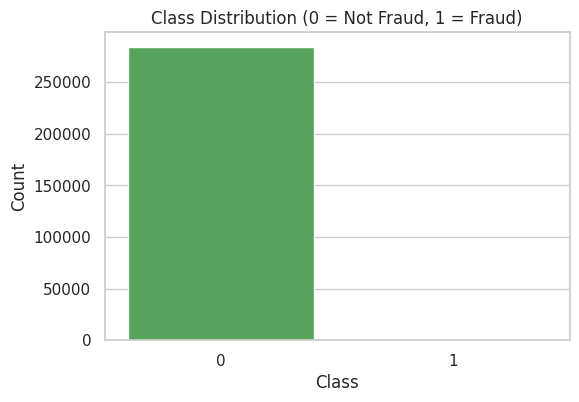

 Class Counts:
Class
0    284315
1       492
Name: count, dtype: int64

 Class Percentage:
Class
0    99.8273
1     0.1727
Name: proportion, dtype: float64


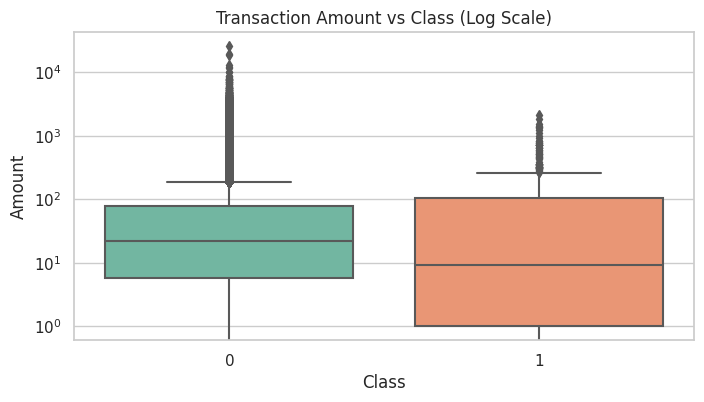


 Amount Statistics by Class:
          count        mean         std  min   25%    50%     75%       max
Class                                                                      
0      284315.0   88.291022  250.105092  0.0  5.65  22.00   77.05  25691.16
1         492.0  122.211321  256.683288  0.0  1.00   9.25  105.89   2125.87


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


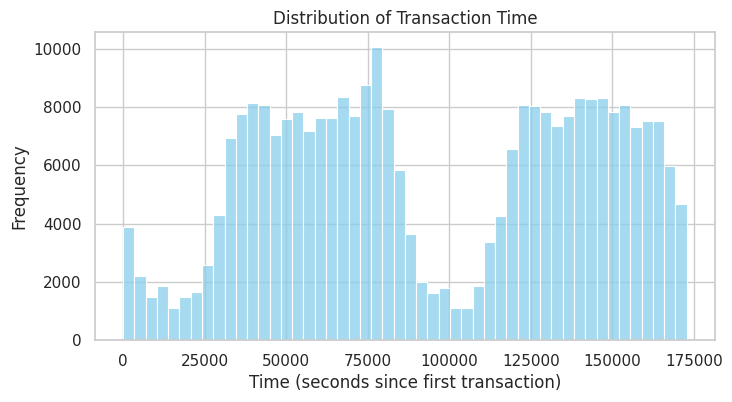


 Time Statistics:
count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64


In [3]:
# ============================
# Basic EDA
# ============================

import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look cleaner
sns.set(style="whitegrid")

# -------------------------------------
# 1. Visualize Class Distribution
# -------------------------------------

plt.figure(figsize=(6,4))
sns.countplot(x="Class", data=df, palette=["#4CAF50", "#F44336"])
plt.title("Class Distribution (0 = Not Fraud, 1 = Fraud)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# Print numerical count & percentage (more readable)
print(" Class Counts:")
print(df["Class"].value_counts())

print("\n Class Percentage:")
print((df["Class"].value_counts(normalize=True) * 100).round(4))

# -------------------------------------
# 2. Check Statistics of Amount Feature
# -------------------------------------

plt.figure(figsize=(8,4))
sns.boxplot(x="Class", y="Amount", data=df, palette="Set2")
plt.yscale("log")   # Fraud amounts often vary a lot → log scale helps visualization
plt.title("Transaction Amount vs Class (Log Scale)")
plt.show()

print("\n Amount Statistics by Class:")
print(df.groupby("Class")["Amount"].describe())

# -------------------------------------
# 3. Quick overview of Time Feature
# -------------------------------------

plt.figure(figsize=(8,4))
sns.histplot(df["Time"], bins=50, kde=False, color="skyblue")
plt.title("Distribution of Transaction Time")
plt.xlabel("Time (seconds since first transaction)")
plt.ylabel("Frequency")
plt.show()

print("\n Time Statistics:")
print(df["Time"].describe())


## Train–Test Split (with Stratification)

In [4]:
# ============================
# Cell 3: Train–Test Split (with Stratification)
# ============================

from sklearn.model_selection import train_test_split

# -------------------------------------
# 1. Separate features (X) and target (y)
# -------------------------------------

# X = all columns except "Class"
X = df.drop("Class", axis=1)

# y = target column
y = df["Class"]

print("Features shape (X):", X.shape)
print("Target shape (y):", y.shape)

# -------------------------------------
# 2. Train–Test Split with Stratification
# -------------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,        # 20% for testing, 80% for training
    random_state=42,      # for reproducibility
    stratify=y            # preserves class distribution
)
# Stratification ensures that the train and test sets maintain the same class proportions 
# as the original dataset.

print("\nTrain set shape (X_train):", X_train.shape)
print("Test set shape  (X_test):", X_test.shape)

# -------------------------------------
# 3. Check class distribution in train and test sets
# -------------------------------------

print("\nClass distribution in y_train (counts):")
print(y_train.value_counts())

print("\nClass distribution in y_train (percentage):")
print((y_train.value_counts(normalize=True) * 100).round(4))

print("\nClass distribution in y_test (counts):")
print(y_test.value_counts())

print("\nClass distribution in y_test (percentage):")
print((y_test.value_counts(normalize=True) * 100).round(4))


Features shape (X): (284807, 30)
Target shape (y): (284807,)

Train set shape (X_train): (227845, 30)
Test set shape  (X_test): (56962, 30)

Class distribution in y_train (counts):
Class
0    227451
1       394
Name: count, dtype: int64

Class distribution in y_train (percentage):
Class
0    99.8271
1     0.1729
Name: proportion, dtype: float64

Class distribution in y_test (counts):
Class
0    56864
1       98
Name: count, dtype: int64

Class distribution in y_test (percentage):
Class
0    99.828
1     0.172
Name: proportion, dtype: float64


## Feature Scaling (Time & Amount)

In [5]:
# ============================
# Cell 4: Feature Scaling (Time & Amount)
# ============================

from sklearn.preprocessing import StandardScaler

# -------------------------------------
# 1. Create copies of X_train and X_test
#    to avoid modifying the original data
# -------------------------------------
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# -------------------------------------
# 2. Initialize the scaler
# -------------------------------------
scaler = StandardScaler()

# -------------------------------------
# 3. Fit scaler ONLY on training data
#    and transform both train and test
# -------------------------------------
cols_to_scale = ["Time", "Amount"]

# Fit on training data
X_train_scaled[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])

# Transform test data using the same scaler
X_test_scaled[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

# -------------------------------------
# 4. Show a quick comparison before/after scaling
# -------------------------------------
print("Before Scaling (Train):")
print(X_train[cols_to_scale].head())

print("\nAfter Scaling (Train):")
print(X_train_scaled[cols_to_scale].head())


Before Scaling (Train):
            Time  Amount
265518  161919.0    7.32
180305  124477.0    2.99
42664    41191.0  175.10
198723  132624.0    6.10
82325    59359.0   86.10

After Scaling (Train):
            Time    Amount
265518  1.411588 -0.322494
180305  0.623141 -0.339764
42664  -1.130680  0.346693
198723  0.794699 -0.327360
82325  -0.748102 -0.008281


## Baseline Model: Logistic Regression (with Class Weights) 

In [6]:
# ============================
# Cell 5: Baseline Model - Logistic Regression
# ============================

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# -------------------------------------
# 1. Initialize Logistic Regression model
# -------------------------------------

log_reg = LogisticRegression(
    class_weight="balanced",  # handle class imbalance by giving more weight to minority class
    max_iter=1000,            # increase iterations to ensure convergence
    n_jobs=-1,                # use all available CPU cores
    solver="lbfgs"            # default solver suitable for smaller to medium-sized datasets
)

# -------------------------------------
# 2. Train (fit) the model on the scaled training data
# -------------------------------------

log_reg.fit(X_train_scaled, y_train)

# -------------------------------------
# 3. Make predictions on the test set
# -------------------------------------

y_pred_lr = log_reg.predict(X_test_scaled)             # predicted class labels (0 or 1)
y_proba_lr = log_reg.predict_proba(X_test_scaled)[:,1] # predicted probability of class 1 (fraud)

# -------------------------------------
# 4. Evaluate the model
# -------------------------------------

# Classification report: precision, recall, f1-score per class
print("Classification Report - Logistic Regression (class_weight='balanced'):")
print(classification_report(y_test, y_pred_lr, digits=4))

# Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix - Logistic Regression:")
print(cm_lr)

# ROC-AUC score using predicted probabilities
roc_auc_lr = roc_auc_score(y_test, y_proba_lr)
print("\nROC-AUC Score - Logistic Regression: {:.4f}".format(roc_auc_lr))


Classification Report - Logistic Regression (class_weight='balanced'):
              precision    recall  f1-score   support

           0     0.9999    0.9756    0.9876     56864
           1     0.0610    0.9184    0.1144        98

    accuracy                         0.9755     56962
   macro avg     0.5304    0.9470    0.5510     56962
weighted avg     0.9982    0.9755    0.9861     56962

Confusion Matrix - Logistic Regression:
[[55478  1386]
 [    8    90]]

ROC-AUC Score - Logistic Regression: 0.9721


## Evaluation Plots for Logistic Regression

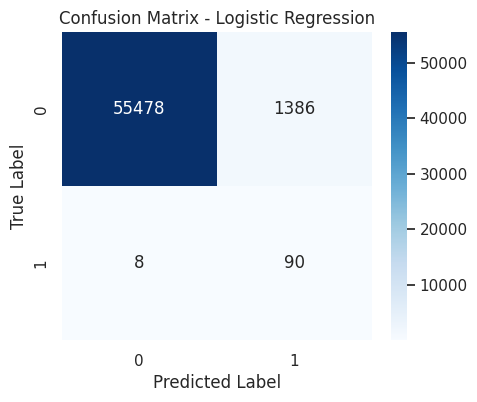

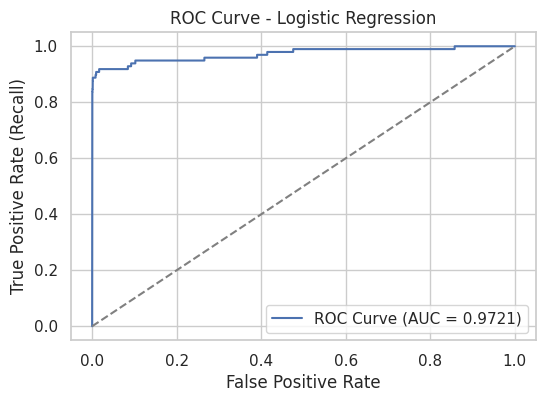

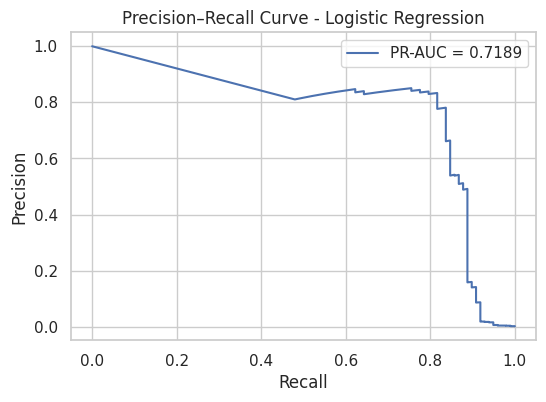

Precision–Recall AUC: 0.7189


In [7]:
# ============================
# Cell 6: Evaluation Plots for Logistic Regression
# ============================

from sklearn.metrics import (
    roc_curve,
    precision_recall_curve,
    average_precision_score
)
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# -------------------------------------
# 1. Confusion Matrix Heatmap
# -------------------------------------

plt.figure(figsize=(5,4))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# -------------------------------------
# 2. ROC Curve
# -------------------------------------

fpr, tpr, thresholds = roc_curve(y_test, y_proba_lr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_lr:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

# -------------------------------------
# 3. Precision–Recall Curve
# -------------------------------------

precision, recall, pr_thresholds = precision_recall_curve(y_test, y_proba_lr)
pr_auc = average_precision_score(y_test, y_proba_lr)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f"PR-AUC = {pr_auc:.4f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve - Logistic Regression")
plt.legend()
plt.show()

# Print PR-AUC for reference
print("Precision–Recall AUC:", round(pr_auc, 4))


## Random Forest (with class_weight='balanced')

In [8]:
# ============================
# Cell 7: Random Forest - class_weight="balanced"
# ============================

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# -------------------------------------
# 1. Initialize Random Forest model
# -------------------------------------

rf_clf = RandomForestClassifier(
    n_estimators=200,         # number of trees in the forest
    max_depth=None,          # trees expand until all leaves are pure or min_samples criteria is met
    min_samples_split=2,     # default split criterion
    min_samples_leaf=1,      # minimum samples required at a leaf node
    class_weight="balanced", # handle class imbalance by weighting minority class more
    n_jobs=-1,               # use all CPU cores for speed
    random_state=42          # for reproducibility
)

# -------------------------------------
# 2. Train (fit) the model on the scaled training data
# -------------------------------------

rf_clf.fit(X_train_scaled, y_train)

# -------------------------------------
# 3. Make predictions on the test set
# -------------------------------------

y_pred_rf = rf_clf.predict(X_test_scaled)              # predicted class labels
y_proba_rf = rf_clf.predict_proba(X_test_scaled)[:, 1] # predicted probability of class 1 (fraud)

# -------------------------------------
# 4. Evaluate the model
# -------------------------------------

print("Classification Report - Random Forest (class_weight='balanced'):")
print(classification_report(y_test, y_pred_rf, digits=4))

cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix - Random Forest:")
print(cm_rf)

roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
print("\nROC-AUC Score - Random Forest: {:.4f}".format(roc_auc_rf))


Classification Report - Random Forest (class_weight='balanced'):
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     56864
           1     0.9610    0.7551    0.8457        98

    accuracy                         0.9995     56962
   macro avg     0.9803    0.8775    0.9227     56962
weighted avg     0.9995    0.9995    0.9995     56962

Confusion Matrix - Random Forest:
[[56861     3]
 [   24    74]]

ROC-AUC Score - Random Forest: 0.9572


Evaluation Plots for Random Forest

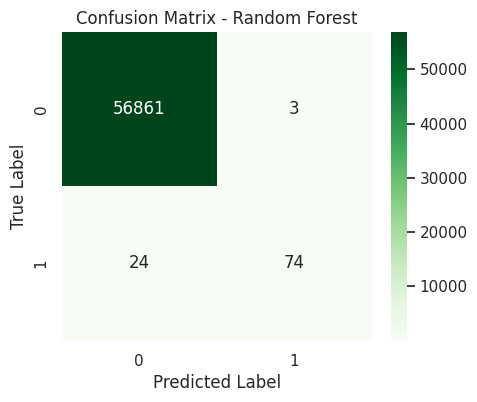

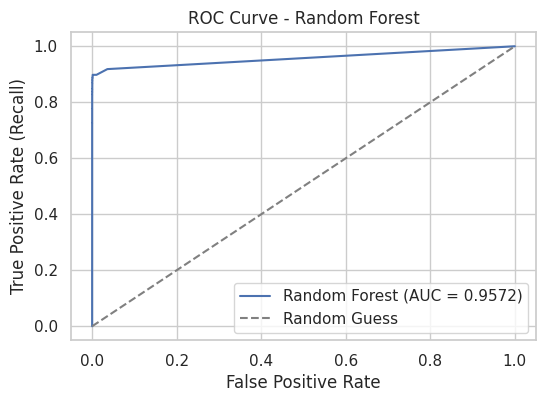

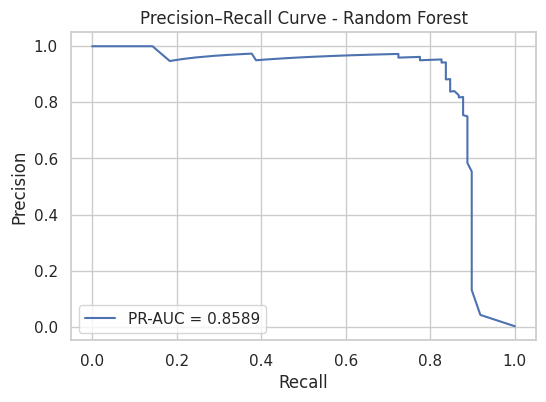

Precision–Recall AUC (Random Forest): 0.8589


In [9]:
# ============================
# Cell 8: Evaluation Plots - Random Forest
# ============================

from sklearn.metrics import (
    roc_curve,
    precision_recall_curve,
    average_precision_score
)
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# -------------------------------------
# 1. Confusion Matrix Heatmap
# -------------------------------------

plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# -------------------------------------
# 2. ROC Curve
# -------------------------------------

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

# -------------------------------------
# 3. Precision–Recall Curve
# -------------------------------------

precision_rf, recall_rf, pr_thresholds_rf = precision_recall_curve(y_test, y_proba_rf)
pr_auc_rf = average_precision_score(y_test, y_proba_rf)

plt.figure(figsize=(6, 4))
plt.plot(recall_rf, precision_rf, label=f"PR-AUC = {pr_auc_rf:.4f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve - Random Forest")
plt.legend()
plt.show()

print("Precision–Recall AUC (Random Forest):", round(pr_auc_rf, 4))


## Random Oversampling + Random Forest

In [10]:
# ============================
# Cell 9: Random Oversampling + Random Forest
# ============================

from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# -------------------------------------
# 1. Combine X_train_scaled and y_train into one DataFrame
# -------------------------------------

train_scaled = X_train_scaled.copy()
train_scaled["Class"] = y_train.values

print("Original class distribution in training data:")
print(train_scaled["Class"].value_counts())

# -------------------------------------
# 2. Split into minority and majority classes
# -------------------------------------

fraud_train = train_scaled[train_scaled["Class"] == 1]
non_fraud_train = train_scaled[train_scaled["Class"] == 0]

print("\nNumber of non-fraud samples in train:", len(non_fraud_train))
print("Number of fraud samples in train:", len(fraud_train))

# -------------------------------------
# 3. Randomly oversample the minority class (fraud)
# -------------------------------------

fraud_oversampled = resample(
    fraud_train,
    replace=True,                 # sample with replacement
    n_samples=len(non_fraud_train),  # match number of majority class
    random_state=42
)

# -------------------------------------
# 4. Create new balanced training set
# -------------------------------------

train_oversampled = pd.concat([non_fraud_train, fraud_oversampled])

# Shuffle rows (optional but good practice)
train_oversampled = train_oversampled.sample(frac=1, random_state=42).reset_index(drop=True)

print("\nClass distribution after oversampling:")
print(train_oversampled["Class"].value_counts())

# -------------------------------------
# 5. Separate features and target for oversampled data
# -------------------------------------

X_train_over = train_oversampled.drop("Class", axis=1)
y_train_over = train_oversampled["Class"]

# -------------------------------------
# 6. Train Random Forest on oversampled data (no class_weight needed)
# -------------------------------------

rf_over = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    class_weight=None,  # no class weights because data is now balanced
    n_jobs=-1,
    random_state=42
)

rf_over.fit(X_train_over, y_train_over)

# -------------------------------------
# 7. Predictions on the ORIGINAL (unmodified) test set
# -------------------------------------

y_pred_rf_over = rf_over.predict(X_test_scaled)
y_proba_rf_over = rf_over.predict_proba(X_test_scaled)[:, 1]

# -------------------------------------
# 8. Evaluation
# -------------------------------------

print("\nClassification Report - Random Forest + Random Oversampling:")
print(classification_report(y_test, y_pred_rf_over, digits=4))

cm_rf_over = confusion_matrix(y_test, y_pred_rf_over)
print("Confusion Matrix - Random Forest + Random Oversampling:")
print(cm_rf_over)

roc_auc_rf_over = roc_auc_score(y_test, y_proba_rf_over)
print("\nROC-AUC Score - Random Forest + Random Oversampling: {:.4f}".format(roc_auc_rf_over))


Original class distribution in training data:
Class
0    227451
1       394
Name: count, dtype: int64

Number of non-fraud samples in train: 227451
Number of fraud samples in train: 394

Class distribution after oversampling:
Class
0    227451
1    227451
Name: count, dtype: int64

Classification Report - Random Forest + Random Oversampling:
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     56864
           1     0.9500    0.7755    0.8539        98

    accuracy                         0.9995     56962
   macro avg     0.9748    0.8877    0.9269     56962
weighted avg     0.9995    0.9995    0.9995     56962

Confusion Matrix - Random Forest + Random Oversampling:
[[56860     4]
 [   22    76]]

ROC-AUC Score - Random Forest + Random Oversampling: 0.9667


## Evaluation Plots for Random Forest + Oversampling

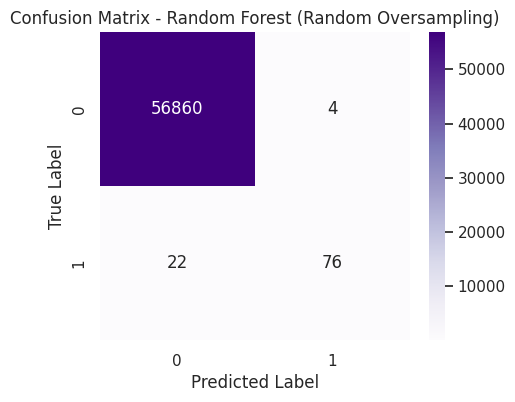

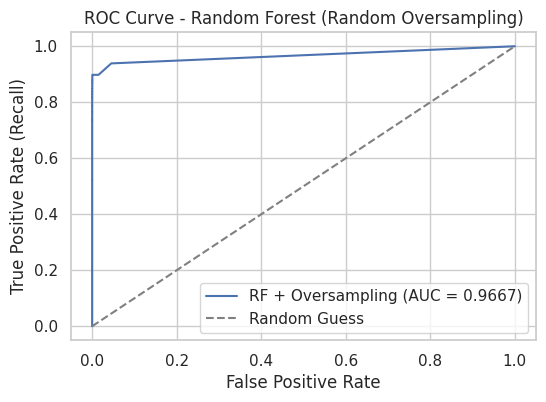

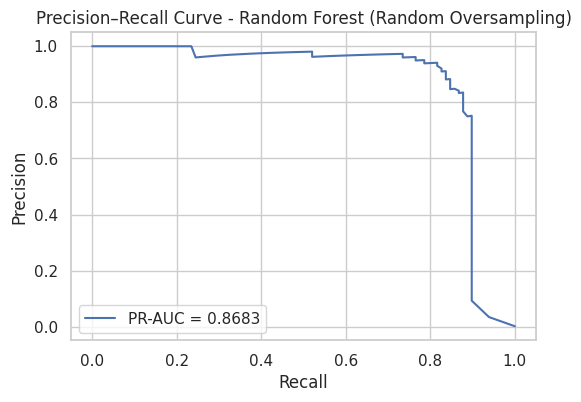

Precision–Recall AUC (Random Forest + Oversampling): 0.8683


In [11]:
# ============================
# Cell 10: Evaluation Plots - Random Forest + Random Oversampling
# ============================

from sklearn.metrics import (roc_curve,precision_recall_curve,average_precision_score)
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# -------------------------------------
# 1. Confusion Matrix Heatmap
# -------------------------------------

plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf_over, annot=True, fmt="d", cmap="Purples")
plt.title("Confusion Matrix - Random Forest (Random Oversampling)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# -------------------------------------
# 2. ROC Curve
# -------------------------------------

fpr_over, tpr_over, thresholds_over = roc_curve(y_test, y_proba_rf_over)

plt.figure(figsize=(6, 4))
plt.plot(fpr_over, tpr_over, label=f"RF + Oversampling (AUC = {roc_auc_rf_over:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - Random Forest (Random Oversampling)")
plt.legend()
plt.show()

# -------------------------------------
# 3. Precision–Recall Curve
# -------------------------------------

precision_over, recall_over, pr_thresholds_over = precision_recall_curve(y_test, y_proba_rf_over)
pr_auc_over = average_precision_score(y_test, y_proba_rf_over)

plt.figure(figsize=(6, 4))
plt.plot(recall_over, precision_over, label=f"PR-AUC = {pr_auc_over:.4f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve - Random Forest (Random Oversampling)")
plt.legend()
plt.show()

print("Precision–Recall AUC (Random Forest + Oversampling):", round(pr_auc_over, 4))


## Custom Threshold Tuning for RF + Oversampling

In [12]:
# ============================
# Cell 11: Custom Threshold Tuning - Random Forest + Oversampling
# ============================

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# -------------------------------------
# 1. Define a helper function to evaluate a given threshold
# -------------------------------------

def evaluate_threshold(y_true, y_proba, threshold):
    """
    Convert probabilities to class predictions using a custom threshold
    and compute precision, recall, f1-score, and confusion matrix.
    """
    y_pred_custom = (y_proba >= threshold).astype(int)
    
    precision = precision_score(y_true, y_pred_custom, zero_division=0)
    recall = recall_score(y_true, y_pred_custom, zero_division=0)
    f1 = f1_score(y_true, y_pred_custom, zero_division=0)
    cm = confusion_matrix(y_true, y_pred_custom)
    
    return precision, recall, f1, cm

# -------------------------------------
# 2. Evaluate multiple thresholds
# -------------------------------------

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

results = []

print("Threshold tuning results for Random Forest + Oversampling:\n")

for thr in thresholds:
    precision, recall, f1, cm = evaluate_threshold(y_test, y_proba_rf_over, thr)
    results.append((thr, precision, recall, f1))
    
    print(f"Threshold = {thr:.2f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall   : {recall:.4f}")
    print(f"  F1-score : {f1:.4f}")
    print(f"  Confusion Matrix:\n{cm}\n")

# -------------------------------------
# 3. Find the threshold with the best F1-score (among tested thresholds)
# -------------------------------------

best_thr, best_prec, best_rec, best_f1 = max(results, key=lambda x: x[3])

print("Best threshold based on F1-score (from tested values):")
print(f"  Threshold: {best_thr:.2f}")
print(f"  Precision: {best_prec:.4f}")
print(f"  Recall   : {best_rec:.4f}")
print(f"  F1-score : {best_f1:.4f}")


Threshold tuning results for Random Forest + Oversampling:

Threshold = 0.10
  Precision: 0.7040
  Recall   : 0.8980
  F1-score : 0.7892
  Confusion Matrix:
[[56827    37]
 [   10    88]]

Threshold = 0.20
  Precision: 0.8333
  Recall   : 0.8673
  F1-score : 0.8500
  Confusion Matrix:
[[56847    17]
 [   13    85]]

Threshold = 0.30
  Precision: 0.8913
  Recall   : 0.8367
  F1-score : 0.8632
  Confusion Matrix:
[[56854    10]
 [   16    82]]

Threshold = 0.40
  Precision: 0.9302
  Recall   : 0.8163
  F1-score : 0.8696
  Confusion Matrix:
[[56858     6]
 [   18    80]]

Threshold = 0.50
  Precision: 0.9506
  Recall   : 0.7857
  F1-score : 0.8603
  Confusion Matrix:
[[56860     4]
 [   21    77]]

Threshold = 0.60
  Precision: 0.9615
  Recall   : 0.7653
  F1-score : 0.8523
  Confusion Matrix:
[[56861     3]
 [   23    75]]

Threshold = 0.70
  Precision: 0.9730
  Recall   : 0.7347
  F1-score : 0.8372
  Confusion Matrix:
[[56862     2]
 [   26    72]]

Best threshold based on F1-score (fro

## Comparison Table

In [13]:
# ============================
# Cell 12: Model Comparison Table
# ============================

import pandas as pd

comparison_data = {
    "Model": [
        "Logistic Regression (class_weight=balanced)",
        "Random Forest (class_weight=balanced)",
        "Random Forest + Oversampling (threshold=0.50)",
        "Random Forest + Oversampling (threshold=0.40 - best)"
    ],
    "Precision (Fraud)": [
        0.0610,
        0.9610,
        0.9500,
        0.9302
    ],
    "Recall (Fraud)": [
        0.9184,
        0.7551,
        0.7755,
        0.8163
    ],
    "F1-score (Fraud)": [
        0.1144,
        0.8457,
        0.8539,
        0.8696
    ],
    "ROC-AUC": [
        0.9721,
        0.9572,
        0.9667,
        0.9667
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print("Model Comparison Table:")
comparison_df


Model Comparison Table:


,Model,Precision (Fraud),Recall (Fraud),F1-score (Fraud),ROC-AUC
0,Logistic Regression (class_weight=balanced),0.0610,0.9184,0.1144,0.9721
1,Random Forest (class_weight=balanced),0.9610,0.7551,0.8457,0.9572
2,Random Forest + Oversampling (threshold=0.50),0.9500,0.7755,0.8539,0.9667
3,Random Forest + Oversampling (threshold=0.40 -...,0.9302,0.8163,0.8696,0.9667


## Feature Importance Plot (Random Forest)

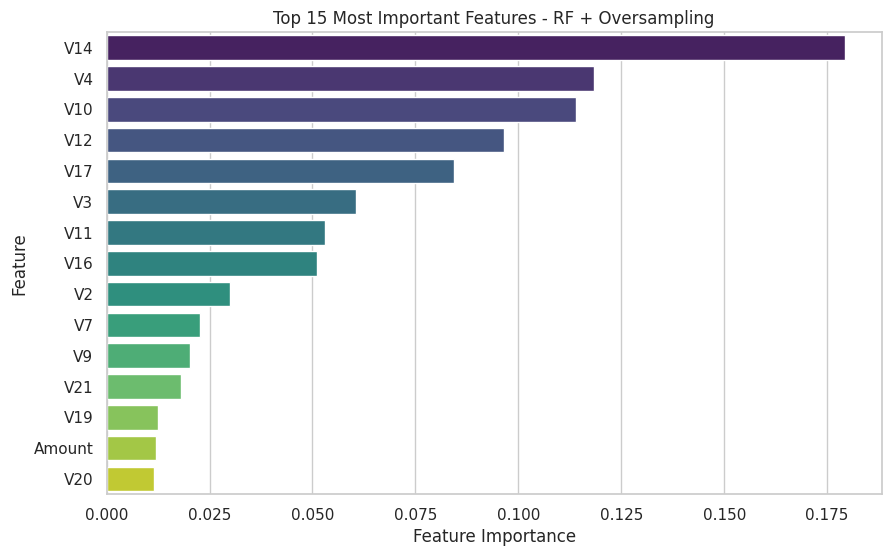

In [14]:
# ============================
# Cell 13: Feature Importance (Random Forest + Oversampling)
# ============================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the oversampled Random Forest model
importances = rf_over.feature_importances_
feature_names = X_train_over.columns

# Create a sorted index based on importance
indices = np.argsort(importances)[::-1]

# Top 15 features (for cleaner plot)
top_n = 15
top_features = indices[:top_n]

plt.figure(figsize=(10, 6))
sns.barplot(
    x=importances[top_features],
    y=feature_names[top_features],
    palette="viridis"
)
plt.title("Top 15 Most Important Features - RF + Oversampling")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()


# 🏁 Conclusion

In this project, I built an end-to-end machine learning pipeline for credit card fraud detection using the Kaggle credit card fraud dataset. The dataset posed a significant challenge due to extreme class imbalance (~0.17% fraud cases). To address this, I applied stratified splitting, careful preprocessing, class-weighted models, random oversampling, and threshold tuning.

After comparing multiple models, the **best performing model** was:

### ✅ Random Forest + Random Oversampling + Threshold = 0.40  
- **Precision:** 93.02%  
- **Recall:** 81.63%  
- **F1-score:** 0.8696 (best among all models)  
- **ROC-AUC:** 0.9667  
- Only **6 false positives** and **18 false negatives** in the test set.

This threshold offered the best trade-off between catching fraudulent transactions and minimizing false alarms — a realistic requirement for financial systems.

### Key Learnings:
- Handling class imbalance is essential for fraud detection.
- Class weights, oversampling, and threshold tuning significantly change model behavior.
- Ensemble models like Random Forest outperform linear models on this dataset.
- Proper evaluation metrics (recall, precision, PR-AUC) matter more than accuracy.
- Avoiding data leakage is critical for trustworthy results.

### Final Thought
This project demonstrates a complete ML workflow: EDA, preprocessing, modeling, evaluation, interpretability, and optimization. 
